# Data Science QUESTION 2

  
You'll be asked to do some analysis and modeling tasks on a dataset created.  
The dataset concerns a video gaming company that has information on its customers and would like to gain more insights on what drives their customers to play for longer hours.  

The following tables are provided:

In [15]:
import pandas as pd

In [16]:
df_districts_house_prices = pd.read_csv("df_districts_house_prices.csv")
df_person_data = pd.read_csv("df_person_data.csv")
df_person_district = pd.read_csv("df_person_district.csv")

df_person_district

includes information about each customer (person) and the district they live in

- person_id: the person id
- district: the name of the district

In [17]:
df_person_district

,person_id,district
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone
1,16f3bafb-9556-434e-adab-cb02f41fe32a,Tashnerspool
2,0fa17eee-7214-4609-97fe-dd3093601800,Tashnerspool
3,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,Ulven
4,51fed64a-375e-417f-94e4-4d27c368ea44,Red Onvey
...,...,...
69995,8cbea1e2-3257-4db5-ae59-84faa48cfde2,Bluffssel
69996,e099ace5-a760-4362-a9ea-ae8cee590b86,Highnantmar
69997,e9b0604e-ec84-4704-8e75-eabfd59ac4fb,Tashnerspool
69998,e20f8ec5-0ddf-4674-ac1f-d6280b6640ab,Highnantmar


df_districts_house_prices

includes information about each district and the prices of the houses in the district

- district: the name of the district
- house_price: the price of the house
- house_number: the house number in the district

In [4]:
df_districts_house_prices

,district,house_price,house_number
0,Celowsgan,160652.0,1
1,Celowsgan,159219.0,2
2,Celowsgan,161543.0,3
3,Celowsgan,158944.0,4
4,Celowsgan,164121.0,5
...,...,...,...
1358,El Willong,932441.0,30
1359,El Willong,890190.0,31
1360,El Willong,892096.0,32
1361,El Willong,935117.0,33


df_person_data

includes personal information about each of the customers and relevant information to their video gaming habits

- person_id: identifier for a person
- age: the age of the person
- n_kids: the number of kids this person has
- n_vg: the number of video games the person owns
- n_con: the number of video game consols the person owns
- n_presub: the number of premium subscription the person owns
- n_hours_playing: the total number of hours this person play per month 

In [5]:
df_person_data

,person_id,age,n_kids,n_vg,n_con,n_presub,n_hours_playing
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745
1,16f3bafb-9556-434e-adab-cb02f41fe32a,18.0,0,2,0,0,20.693273
2,0fa17eee-7214-4609-97fe-dd3093601800,28.0,0,3,0,0,22.412490
3,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,20.0,1,72,0,0,299.187025
4,51fed64a-375e-417f-94e4-4d27c368ea44,32.0,1,58,1,3,20.367141
...,...,...,...,...,...,...,...
69995,8cbea1e2-3257-4db5-ae59-84faa48cfde2,32.0,4,62,1,2,21.378288
69996,e099ace5-a760-4362-a9ea-ae8cee590b86,36.0,0,53,1,1,3.707476
69997,e9b0604e-ec84-4704-8e75-eabfd59ac4fb,19.0,0,1,1,0,23.809075
69998,e20f8ec5-0ddf-4674-ac1f-d6280b6640ab,31.0,2,49,3,2,15.708397


## Quick EDA

The goals of these questions is to evaluate your plotting, data mangling, and plot interpretation skills.   
Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   

### 1. Plot each district's house prices distribution with marking the mean by a vertical line


In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

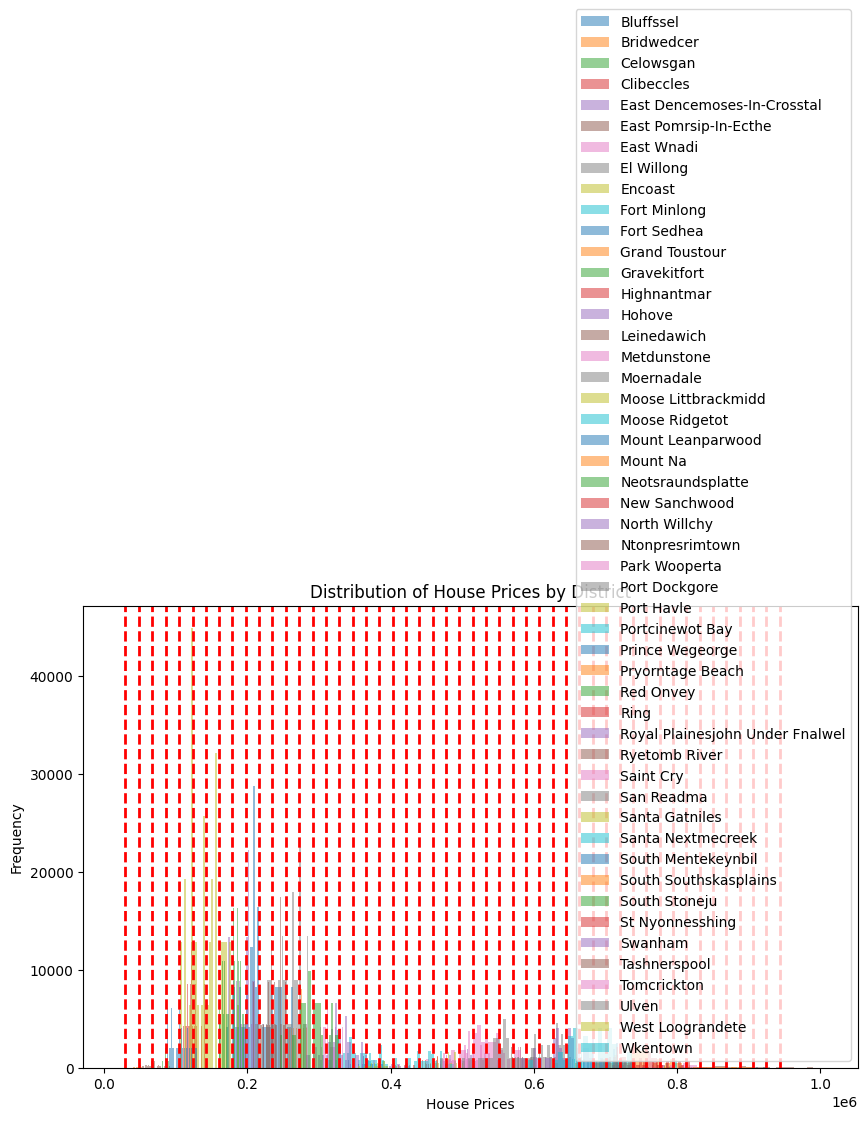

In [35]:
df_merged = pd.merge(df_person_district, df_districts_house_prices, on="district")
df_merged = pd.merge(df_merged, df_person_data, on="person_id")


district_mean_prices = df_merged.groupby('district')['house_price'].mean()


plt.figure(figsize=(10, 6))  

for district_name, group in df_merged.groupby("district"):
    house_prices = group["house_price"]
    
    plt.hist(house_prices, bins=30, alpha=0.5, label=district_name)


    mean_house_price = district_mean_prices[district_name]
    plt.axvline(mean_house_price, color='r', linestyle='--', linewidth=2)


plt.xlabel('House Prices')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices by District')
plt.legend()


plt.show()

### 2. Combine all of the three data sources into one table to use in further analysis. 

In [36]:
df_combined = pd.merge(df_person_district, df_districts_house_prices, on="district")
df_combined = pd.merge(df_combined, df_person_data, on="person_id")


print(df_combined.head())

                              person_id     district  house_price  \
0  50c4c7e2-89a6-440b-a8e3-c44aa2c6150e  Metdunstone     323177.0   
1  50c4c7e2-89a6-440b-a8e3-c44aa2c6150e  Metdunstone          NaN   
2  50c4c7e2-89a6-440b-a8e3-c44aa2c6150e  Metdunstone     333360.0   
3  50c4c7e2-89a6-440b-a8e3-c44aa2c6150e  Metdunstone     319360.0   
4  50c4c7e2-89a6-440b-a8e3-c44aa2c6150e  Metdunstone     333934.0   

   house_number   age  n_kids  n_vg  n_con  n_presub  n_hours_playing  
0             1  14.0       0     0      0         0        18.422745  
1             2  14.0       0     0      0         0        18.422745  
2             3  14.0       0     0      0         0        18.422745  
3             4  14.0       0     0      0         0        18.422745  
4             5  14.0       0     0      0         0        18.422745  


### 3. Plot age vs avg house price. What does this plot tell you? (younger people live in more expensive districts)

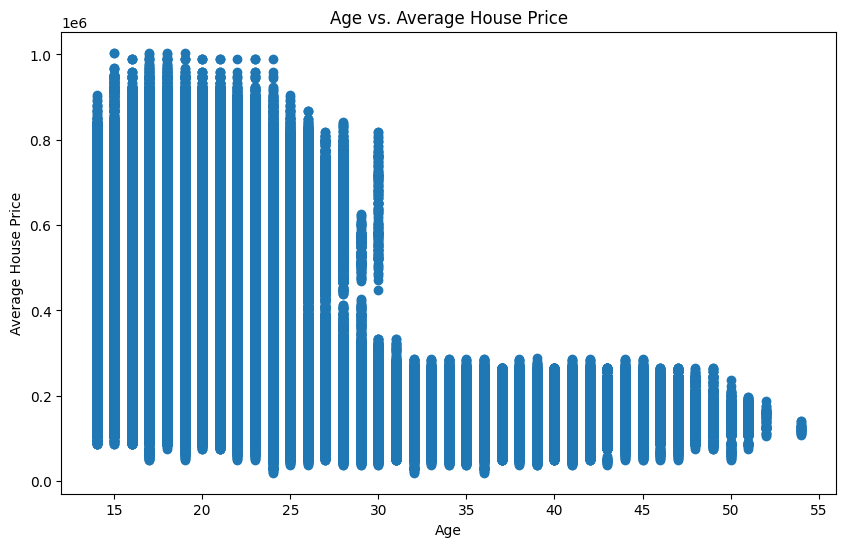

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['age'], df_combined['house_price'])
plt.xlabel('Age')
plt.ylabel('Average House Price')
plt.title('Age vs. Average House Price')
plt.show()

## Probability and Statistics:

The goal of these questions is to test your ability to answer probability and stat questions with code.   
Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   


### 1. What's the probability of a customer having 2 kids

In [44]:
no_of_customers = len(df_person_data)
kids_2 = df_person_data[df_person_data['n_kids']==2].shape[0]
probability = kids_2 / no_of_customers
print('Probability of 2 kids is',probability)

Probability of 2 kids is 0.10017142857142858


### 2. What's the probability of a customer owning more than 10 video games given that they have less than 2 kids

In [47]:
filtered_customers = df_person_data[df_person_data['n_kids'] < 2]

total_filtered_customers = len(filtered_customers)

customers_more_than_10_games = len(filtered_customers[filtered_customers['n_hours_playing'] > 10])


probability_more_than_10_games_given_less_than_2_kids = customers_more_than_10_games / total_filtered_customers

print("Probability of a customer owning more than 10 video games given less than 2 kids:", probability_more_than_10_games_given_less_than_2_kids)

Probability of a customer owning more than 10 video games given less than 2 kids: 0.9252694610778444


### 3. Plot the distribution of the number of hours played by customers `n_hours_playing`. Briefly explain what you understand now about the customers' playing hours.

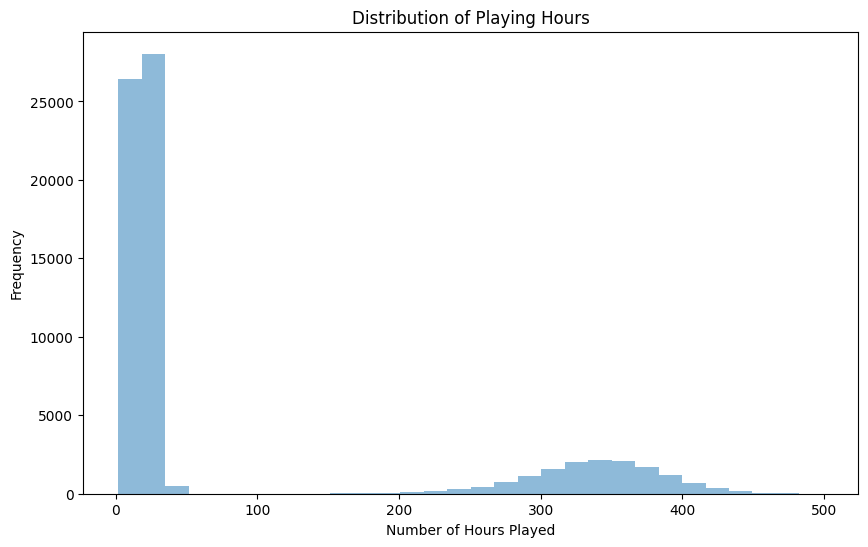

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(df_person_data['n_hours_playing'], bins=30, alpha=0.5)
plt.xlabel('Number of Hours Played')
plt.ylabel('Frequency')
plt.title('Distribution of Playing Hours')
plt.show()

As you can see, most customers have a number of hours less than 50 so let's go ahead and remove any values less than 50.  
The distribution of the remaining values look like a normal distribution.  
###  4. Estimate the parameters (mean and std deviation) of this normal distribution computationally.  \
### (Bonus: plot the estimated normal distribution on top of the distribution of `n_hours_playing` after removing values < 50)

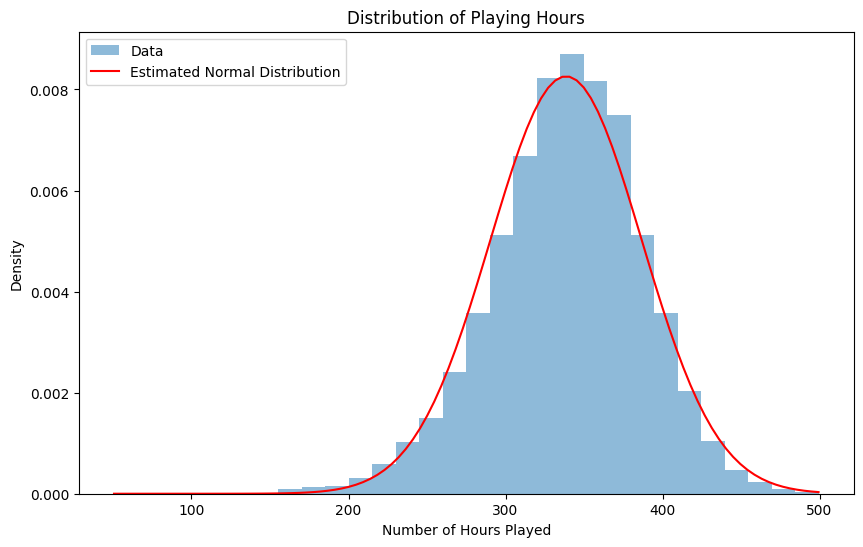

Estimated Mean: 338.54501334662666
Estimated Standard Deviation: 48.2925792379227


In [50]:
from scipy.stats import norm

filtered_hours = df_person_data[df_person_data['n_hours_playing'] >= 50]['n_hours_playing']

mean_est = np.mean(filtered_hours)
std_est = np.std(filtered_hours)


x = np.linspace(min(filtered_hours), max(filtered_hours), 100)


y = norm.pdf(x, mean_est, std_est)


plt.figure(figsize=(10, 6))
plt.hist(filtered_hours, bins=30, density=True, alpha=0.5, label='Data')
plt.plot(x, y, 'r-', label='Estimated Normal Distribution')
plt.xlabel('Number of Hours Played')
plt.ylabel('Density')
plt.title('Distribution of Playing Hours')
plt.legend()
plt.show()

print("Estimated Mean:", mean_est)
print("Estimated Standard Deviation:", std_est)

# Modeling
The goal of this is to showcase your experimentation and model comparison process.  
The performance of models is not as important as how you compare them and evaluate them against each other.  

Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   
# Apply Different regression model 
# Apply two classffier Model for the data of classfication ( as per your choice)

### 1. Model the number of hours played for each customer. Show your experimentation with failed and successful models.
### 2. Evaluate each experiment using appropriate metrics, cross validation, and plots. Show the predicted vs actual plot.
### 3. Choose the best model for the data

In [58]:
df_combined.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2014067 entries, 0 to 2014066
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   person_id        object 
 1   district         object 
 2   house_price      float64
 3   house_number     int64  
 4   age              float64
 5   n_kids           int64  
 6   n_vg             int64  
 7   n_con            int64  
 8   n_presub         int64  
 9   n_hours_playing  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 169.0+ MB


<ipython-input-64-2203f37b003a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_districts_house_prices.corr(),annot=True)


<Axes: >

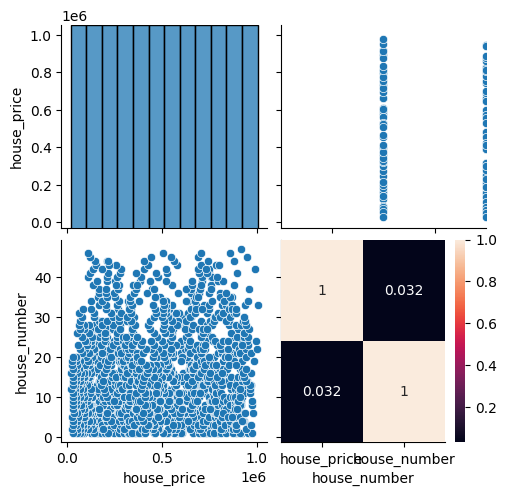

In [64]:
sns.pairplot(df_districts_house_prices)
sns.histplot(df_person_data['n_hours_playing'])
sns.heatmap(df_districts_house_prices.corr(),annot=True)

In [87]:
from pandas.io.pytables import dropna_doc
import os as remove
X = df_person_data.drop(['n_hours_playing', 'person_id'], axis=1)  # Exclude 'n_hours_playing' and 'customer_id'
y = df_person_data['n_hours_playing']

In [88]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [93]:

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3380.1635253484046
R-squared: 0.8117122875712209


In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
rf = RandomForestRegressor()


lr.fit(X_train, y_train)
rf.fit(X_train, y_train)


lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)


lr_error = mean_squared_error(y_test, lr_pred, squared=False)
rf_error = mean_squared_error(y_test, rf_pred, squared=False)

print("Linear Regression Error is:", lr_error)
print("Random Forest Regression Error is:",rf_error)

Linear Regression Error is: 58.13917375873521
Random Forest Regression Error is: 25.161867416782563


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


X = df_person_data.drop(['n_hours_playing','person_id'], axis=1) 
y = df_person_data['n_hours_playing']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)